In [1]:
from DQN import DQN
from datetime import datetime
import matplotlib.pyplot as plt
import gym
from gym import wrappers
import numpy as np
from time import time

In [2]:
env = gym.make('CartPole-v0')

In [3]:
filename = "DQN"
dqn = DQN(env=env, weight_file=filename,
    epsilon=1, epsilon_decay=0.99, epsilon_cutoff=0.05, 
    alpha=0.001, gamma=0.99, numEpisodes=501,
    memorySize=10000, startMemSize=500,
    stepSize=100, batchSize=32)
dqn.createANNModel((16, 8))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
*********** no weights loaded ***********
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 234
Trainable params: 234
Non-trainable params: 0
_________________________________________________________________


In [4]:
print("\n*****Start time: ", datetime.now().time())
dqn.trainDQN(10)
print("\n*****Finish time: ", datetime.now().time())


*****Start time:  16:11:21.113694

episode 10: loss-->0.59+/-0.06, reward-->20.11+/-10.92

episode 20: loss-->0.56+/-0.41, reward-->15.00+/-5.72

episode 30: loss-->0.71+/-0.60, reward-->16.67+/-6.13

episode 40: loss-->1.02+/-0.53, reward-->16.56+/-7.69

episode 50: loss-->1.02+/-0.58, reward-->16.67+/-8.52

episode 60: loss-->1.03+/-0.70, reward-->14.78+/-6.14

episode 70: loss-->0.85+/-0.67, reward-->49.22+/-22.63

episode 80: loss-->1.94+/-2.15, reward-->54.67+/-39.04

episode 90: loss-->2.59+/-1.86, reward-->127.22+/-54.47

episode 100: loss-->4.72+/-8.77, reward-->137.44+/-51.97

episode 110: loss-->9.24+/-9.81, reward-->188.22+/-22.36

episode 120: loss-->4.51+/-6.82, reward-->197.33+/-4.35

episode 130: loss-->4.64+/-7.64, reward-->196.33+/-7.94

episode 140: loss-->12.99+/-35.05, reward-->194.56+/-10.19

episode 150: loss-->6.92+/-18.46, reward-->191.00+/-12.72

episode 160: loss-->14.43+/-40.10, reward-->190.67+/-11.49

episode 170: loss-->0.24+/-0.29, reward-->192.56+/-9.65

Text(0, 0.5, 'training error')

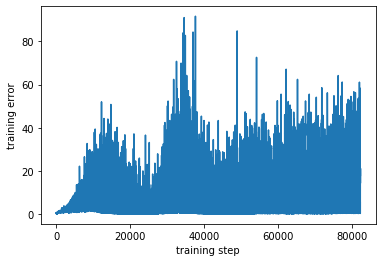

In [5]:
losses = dqn.training_losses
loss_ave = []
loss_std = []
for i in range(len(losses)-10):
  loss_ave.append(np.average(losses[i: i+10]))
  loss_std.append(np.std(losses[i: i+100]))
plt.plot(loss_ave)
plt.xlabel("training step")
plt.ylabel("training error")

Text(0, 0.5, 'reward')

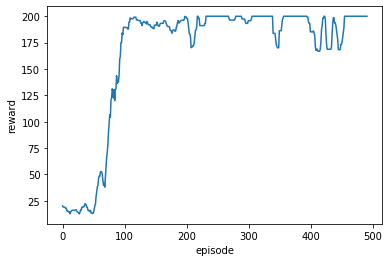

In [6]:
rewards = dqn.training_rewards
reward_ave = []
reward_std = []
for i in range(len(rewards)-10):
  reward_ave.append(np.average(rewards[i: i+10]))
plt.plot(reward_ave)
plt.xlabel("episode")
plt.ylabel("reward")

In [7]:
env = wrappers.Monitor(env, './videos/' + str(time()) + '/')
dqn.env = env
dqn.runOneEpisode(0, render=True, train=False)

200.0

In [8]:
env.close()